# DNA features

In [1]:
import coolbox
from coolbox.api import *

coolbox.__version__

'0.3.9'

In [2]:
test_data_dir = "../../../tests/test_data/"
test_interval = "chr9:4500000-5500000"
example_bed6 = f"{test_data_dir}/bed6_chr9_4000000_6000000.bed"
example_bed9 = f"{test_data_dir}/bed9_chr9_4000000_6000000.bed"
example_bed12 = f"{test_data_dir}/bed_chr9_4000000_6000000.bed"
example_tad = f"{test_data_dir}/tad_chr9_4000000_6000000.bed"

## BED file
### gene style

BED12 format can plot fish-bone like shapes, BED6 and BED9 can not:

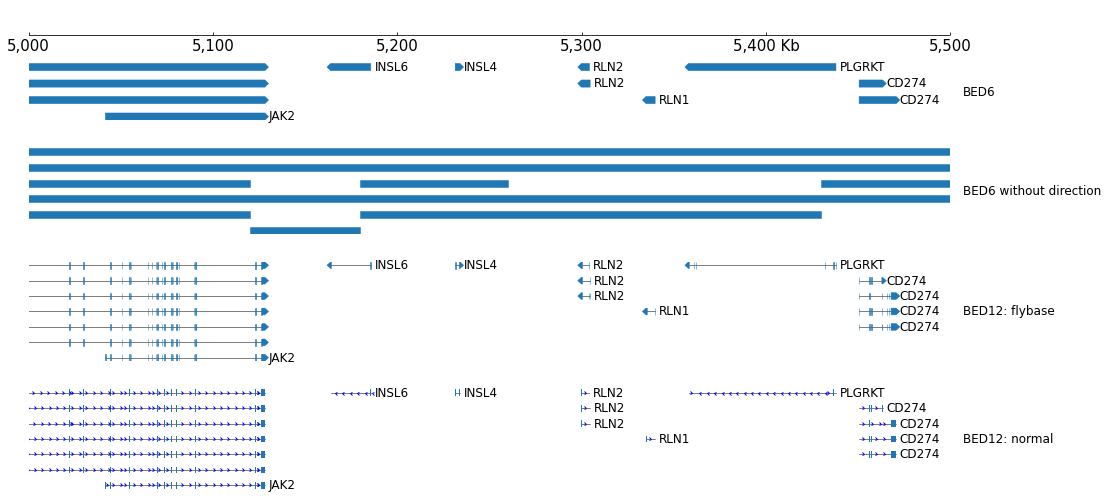

In [3]:
frame = XAxis()
frame += BED(example_bed6) + Title("BED6")
frame += Spacer(1) +  BED(example_tad, labels=False) + Title("BED6 without direction")
frame += Spacer(1) + BED(example_bed12, gene_style='flybase') + Title("BED12: flybase")
frame += Spacer(1) + BED(example_bed12, gene_style='normal') + Title("BED12: normal")
frame.plot("chr9:5000000-5500000")

### layout

The default height of `BED` is `'auto'`, it means the height is auto-growth, we can set the heigh of one row by the `interval_height` parameter:

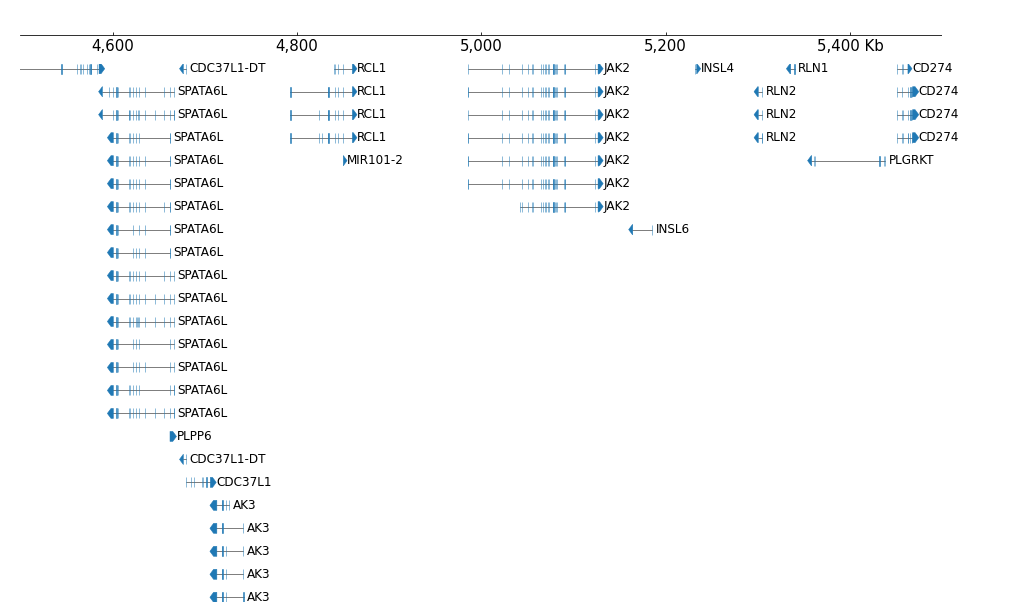

In [4]:
frame = XAxis() + BED(example_bed12, row_height=1.0)
frame.plot(test_interval)

If you want fixed track height, just specify with `'height'` parameter:

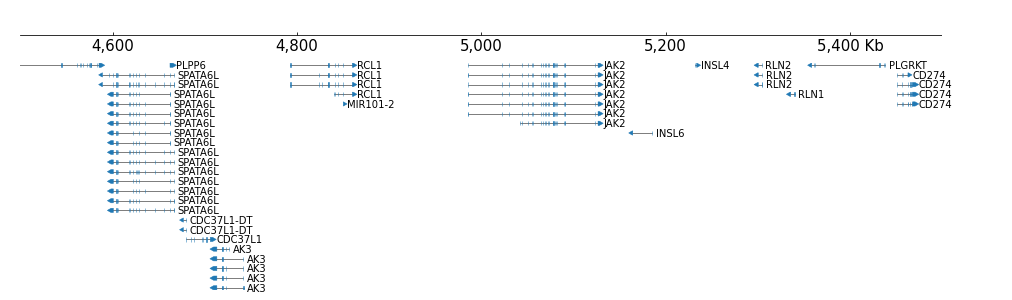

In [5]:
frame = XAxis() + BED(example_bed12, height=8, fontsize=10)
frame.plot(test_interval)

The number of rows to display can be limited by setting `num_rows` parameter:

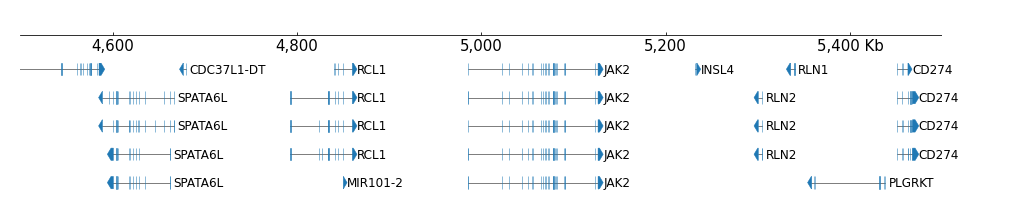

In [6]:
frame = XAxis() + BED(example_bed12, row_height=1.0, num_rows=5)
frame.plot(test_interval)

And rows can be collapsed:

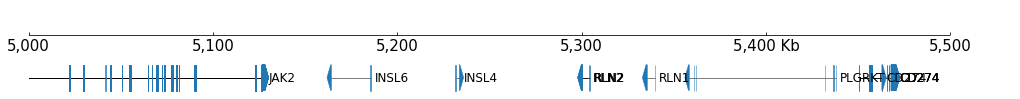

In [7]:
frame = XAxis() + BED(example_bed12, display='collapsed')
frame.plot("chr9:5000000-5500000")

## GTF file

In default GTF only plot genes with `dna-feature-viewer`.

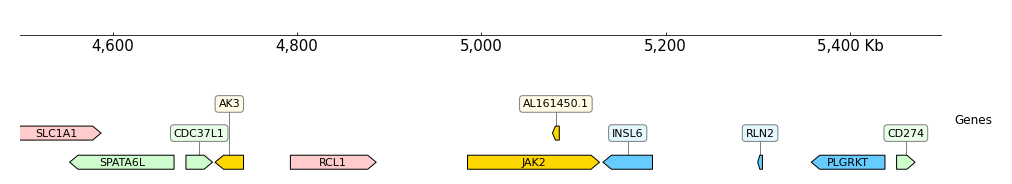

In [8]:
example_gtf = f"{test_data_dir}/gtf_chr9_4000000_6000000.gtf"
frame = XAxis() + GTF(example_gtf) + Title("Genes")
frame.plot(test_interval)

Show transcripts and exons, `'name_attr'` controls show which attribute:

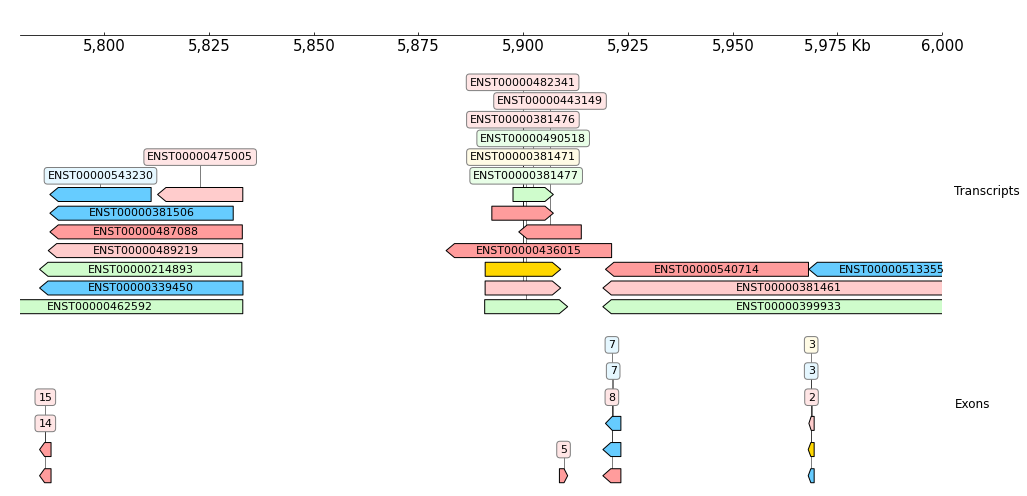

In [9]:
frame = XAxis() 
frame += GTF(example_gtf, row_filter="feature == 'transcript'", name_attr='transcript_id') + TrackHeight(9) + Title("Transcripts")
frame += GTF(example_gtf, row_filter="feature == 'exon'", name_attr='exon_number') + TrackHeight(6) + Title("Exons")
frame.plot("chr9:5780000-6000000")

Attribute means the features in the `attribute` columns of  the GTF:

In [10]:
gtf = GTF(example_gtf)
df = gtf.fetch_data(GenomeRange(test_interval))
df.head(2)

,seqname,source,feature,start,end,score,strand,frame,attribute,feature_name
0,chr9,protein_coding,gene,4490444,4587469,.,+,.,"gene_id ""ENSG00000106688""; gene_name ""SLC1A1"";...",SLC1A1
1,chr9,protein_coding,transcript,4490444,4587469,.,+,.,"gene_id ""ENSG00000106688""; transcript_id ""ENST...",SLC1A1


In [11]:
df.loc[1, 'attribute']

'gene_id "ENSG00000106688"; transcript_id "ENST00000262352"; gene_name "SLC1A1"; gene_source "ensembl_havana"; gene_biotype "protein_coding"; transcript_name "SLC1A1-001"; transcript_source "ensembl_havana"; tag "CCDS"; ccds_id "CCDS6452";'

`row filter` can also filter the rows by other columns, for example only show the transcripts from `JAK2` gene:

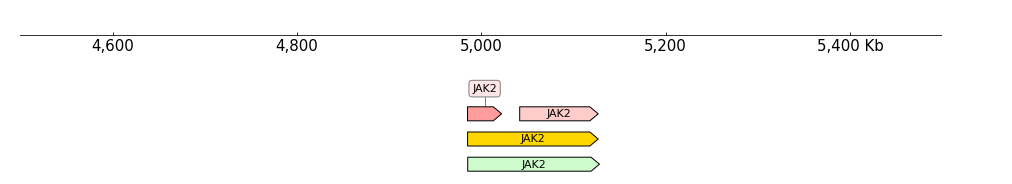

In [12]:
frame = XAxis() 
frame += GTF(example_gtf, row_filter="feature == 'transcript';feature_name == 'JAK2'")
frame.plot(test_interval)